Data Exploration

C:\Users\agrab\AppData\Local\Temp\ipykernel_40644\2237620432.py:79: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=filtered_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_40644\2237620432.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


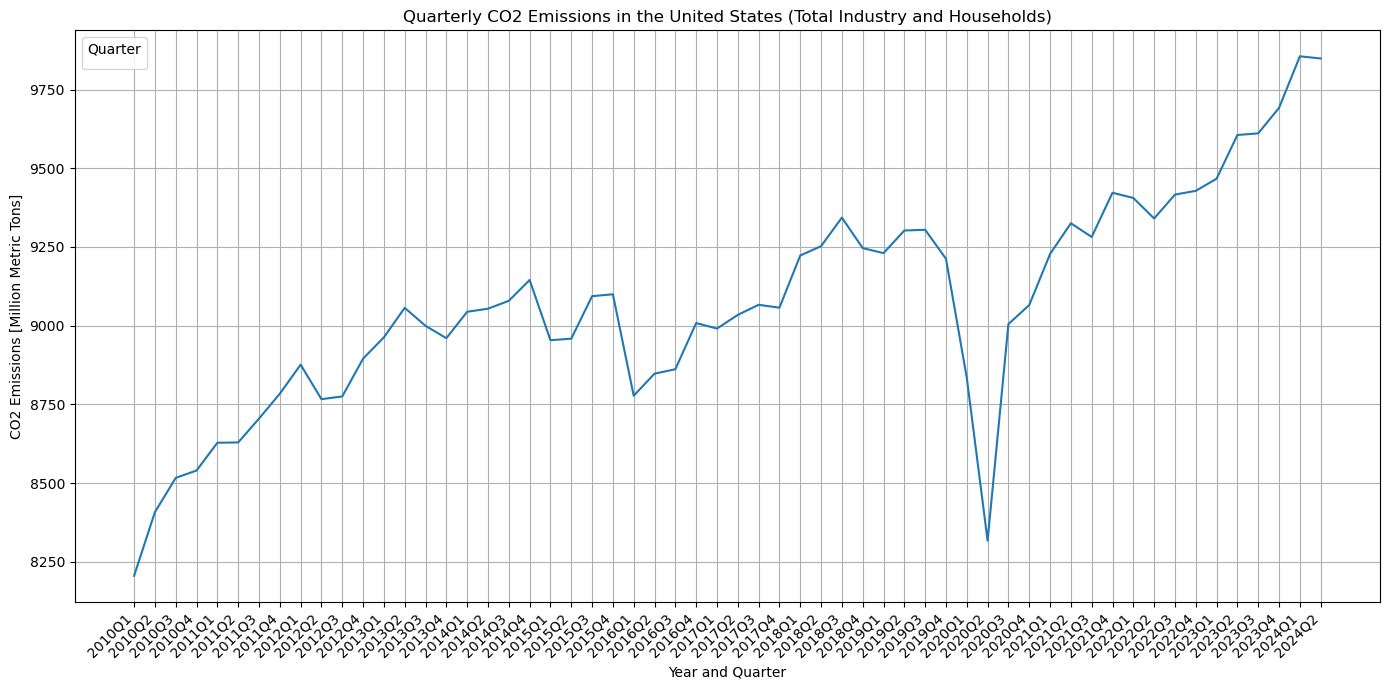

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------------------
# 1. LOAD THE DATASET
# ---------------------------------------------------------------------
file_path = 'data/QuarterlyEmissionData.csv'
df = pd.read_csv(file_path)

# Remove unnecessary columns
df = df.drop(columns=['Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Indicator', 'Unit', 'Scale'])

# ---------------------------------------------------------------------
# 2. TRANSFORM WIDE TO LONG FORMAT
# ---------------------------------------------------------------------
id_vars = [
    'ObjectId', 'Country', 'Industry', 'Gas Type', 'Seasonal Adjustment'
]

# Identify columns to unpivot (columns with years and quarters, e.g., 1995_Q1, 1995_Q2, ...)
value_vars = [col for col in df.columns if any(q in col for q in ['Q1', 'Q2', 'Q3', 'Q4'])]

# Perform the transformation using pd.melt()
df_long = pd.melt(
    df,
    id_vars=id_vars,          # Columns to keep as is
    value_vars=value_vars,    # Columns to unpivot
    var_name='Year_Quarter',  # New column name for years and quarters
    value_name='CO2_Emissions'  # New column name for values
)

# ---------------------------------------------------------------------
# 3. SPLIT 'Year_Quarter' INTO SEPARATE COLUMNS
# ---------------------------------------------------------------------
# Split the 'Year_Quarter' column into 'Year' and 'Quarter'
df_long[['Year', 'Quarter']] = df_long['Year_Quarter'].str.split('Q', expand=True)

# Ensure 'Year' is numeric
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

# Drop the 'Year_Quarter' column as it is no longer needed
df_long = df_long.drop(columns=['Year_Quarter'])

# Drop rows with missing values in critical columns
df_long = df_long.dropna(subset=['Year', 'CO2_Emissions'])

# Convert 'CO2_Emissions' to numeric (if not already)
df_long['CO2_Emissions'] = pd.to_numeric(df_long['CO2_Emissions'], errors='coerce')

# Sort the data by Year and Quarter for better readability
df_long = df_long.sort_values(by=['Year', 'Quarter'])

# ---------------------------------------------------------------------
# 4. CREATE A NEW COLUMN FOR CONTINUOUS QUARTERS
# ---------------------------------------------------------------------
# Combine 'Year' and 'Quarter' into a single column (e.g., '2021Q1')
df_long['Year_Quarter_Combined'] = df_long['Year'].astype(str) + 'Q' + df_long['Quarter']

# To ensure proper ordering, create a numerical representation of Year-Quarter
df_long['Year_Quarter_Num'] = df_long['Year'] + (df_long['Quarter'].astype(int) - 1) / 4

# ---------------------------------------------------------------------
# 5. FILTER THE DATA
# ---------------------------------------------------------------------
filtered_data = df_long[
    (df_long['Country'] == 'World') &
    (df_long['Gas Type'] == 'Carbon dioxide') &
    (df_long['Industry'] == 'Total Industry and Households') &
    (df_long['Seasonal Adjustment'] == 'Seasonally Adjusted')
]

# ---------------------------------------------------------------------
# 6. PLOT THE DATA
# ---------------------------------------------------------------------
plt.figure(figsize=(14, 7))

# Use 'Year_Quarter_Num' for x-axis to ensure continuous increments
sns.lineplot(data=filtered_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)

# Customize x-axis labels to show 'Year_Quarter_Combined'
plt.xticks(
    ticks=filtered_data['Year_Quarter_Num'],
    labels=filtered_data['Year_Quarter_Combined'],
    rotation=45,
    ha='right'
)

plt.title('Quarterly CO2 Emissions in the United States (Total Industry and Households)')
plt.xlabel('Year and Quarter')
plt.ylabel('CO2 Emissions [Million Metric Tons]')
plt.legend(title='Quarter')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\3201924944.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


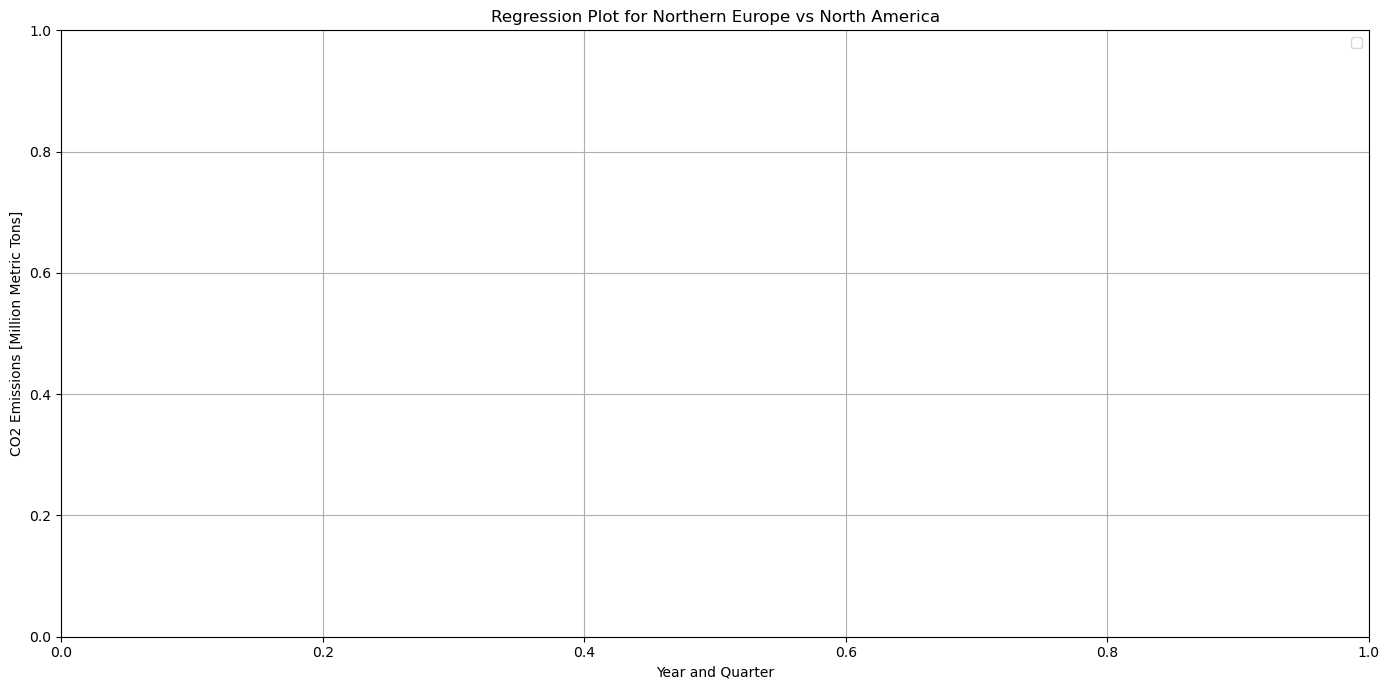

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


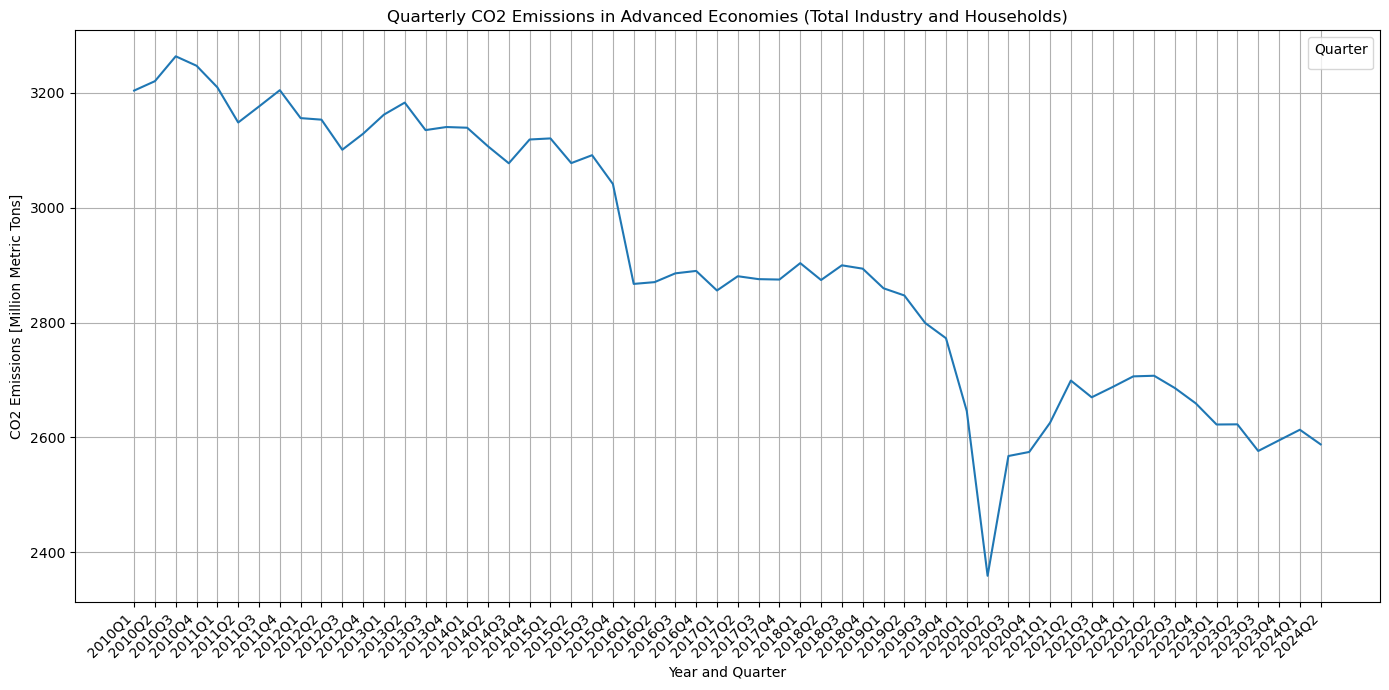

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


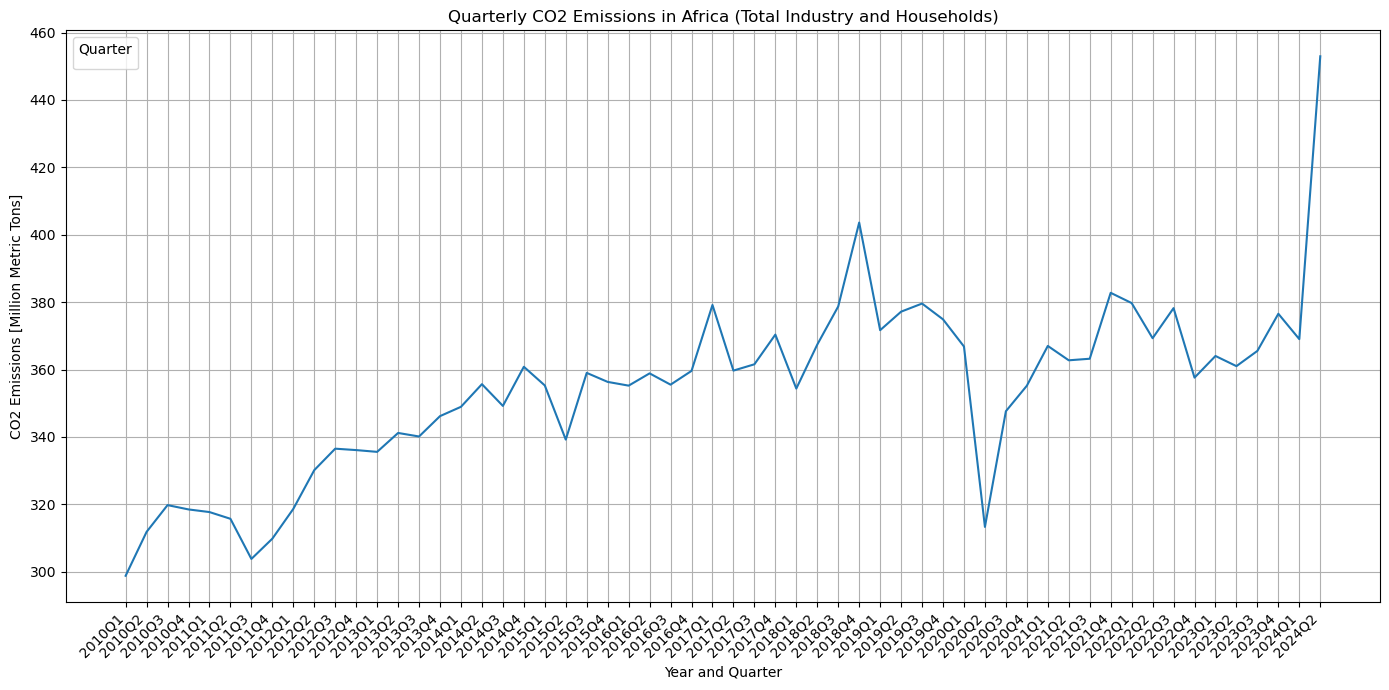

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


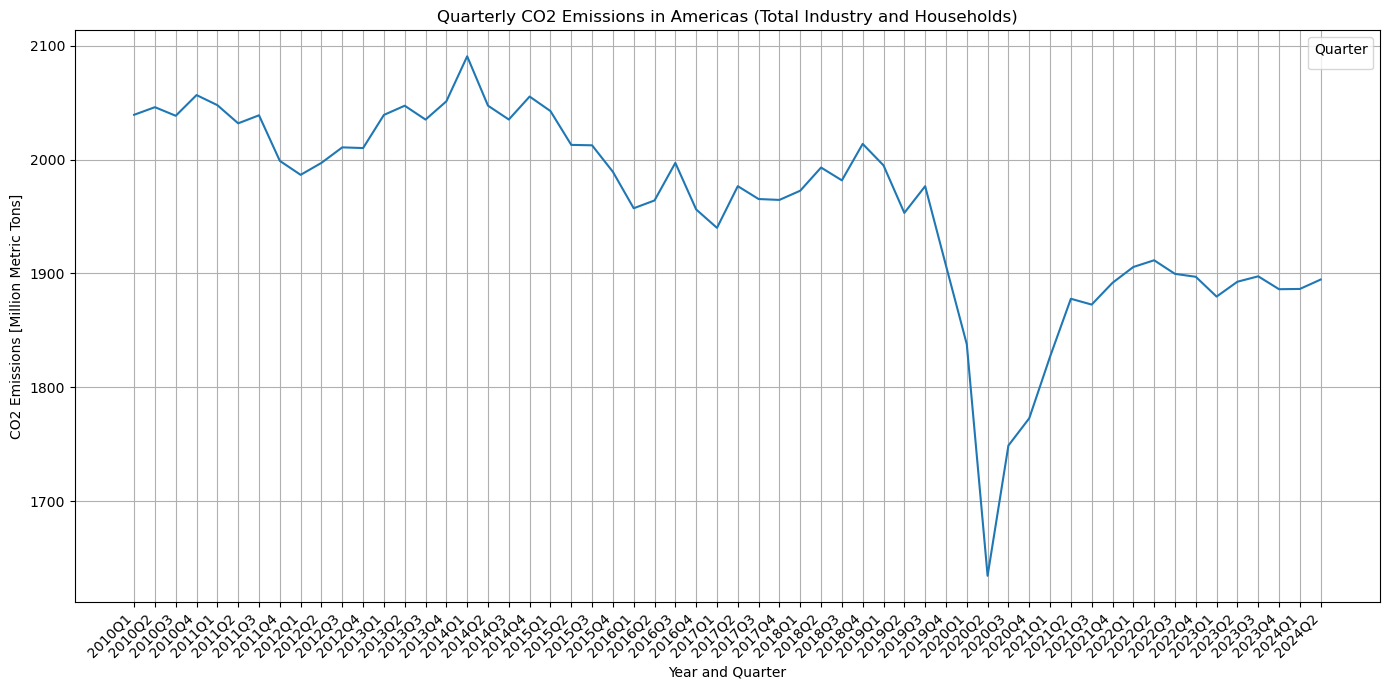

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


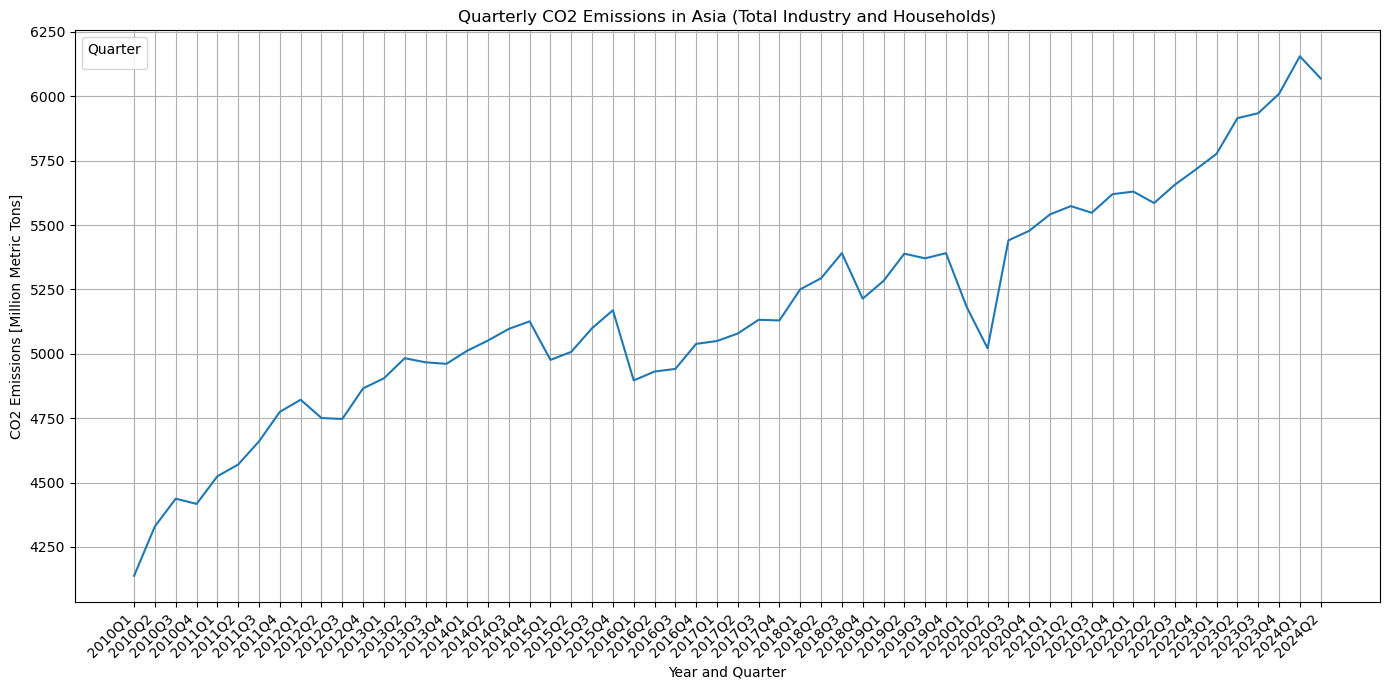

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


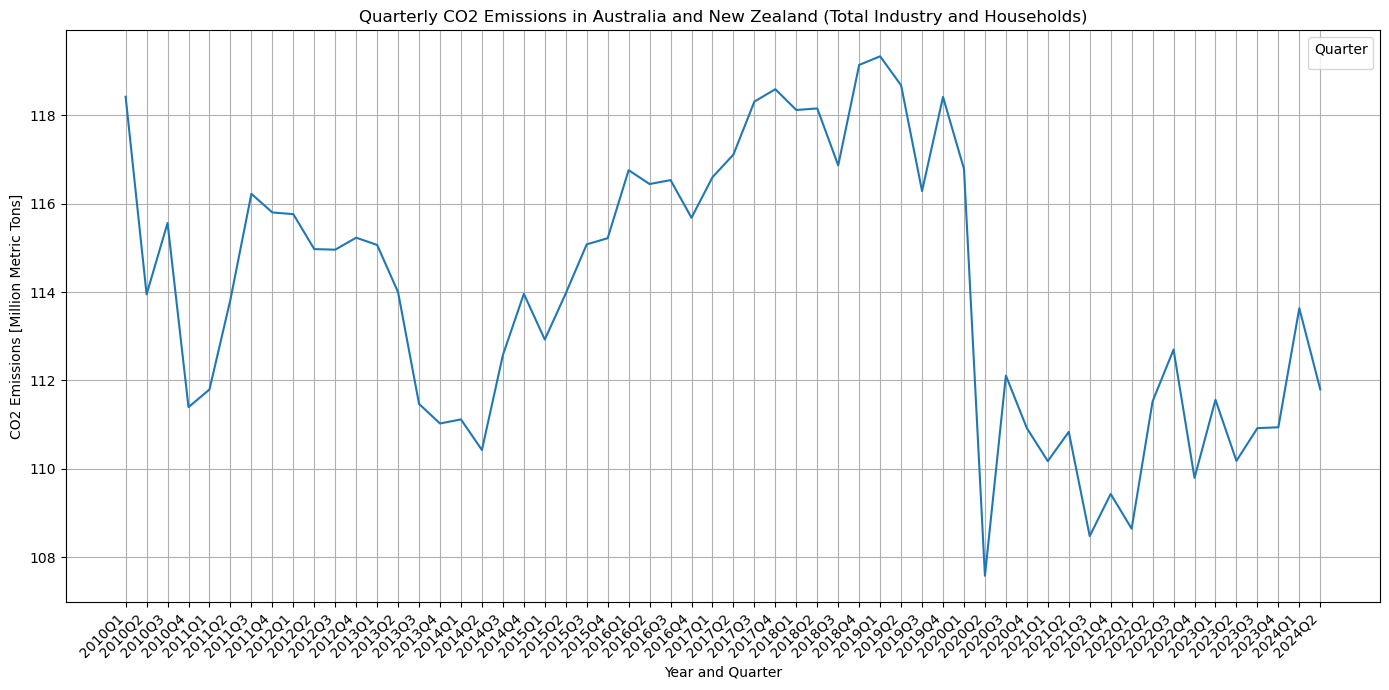

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


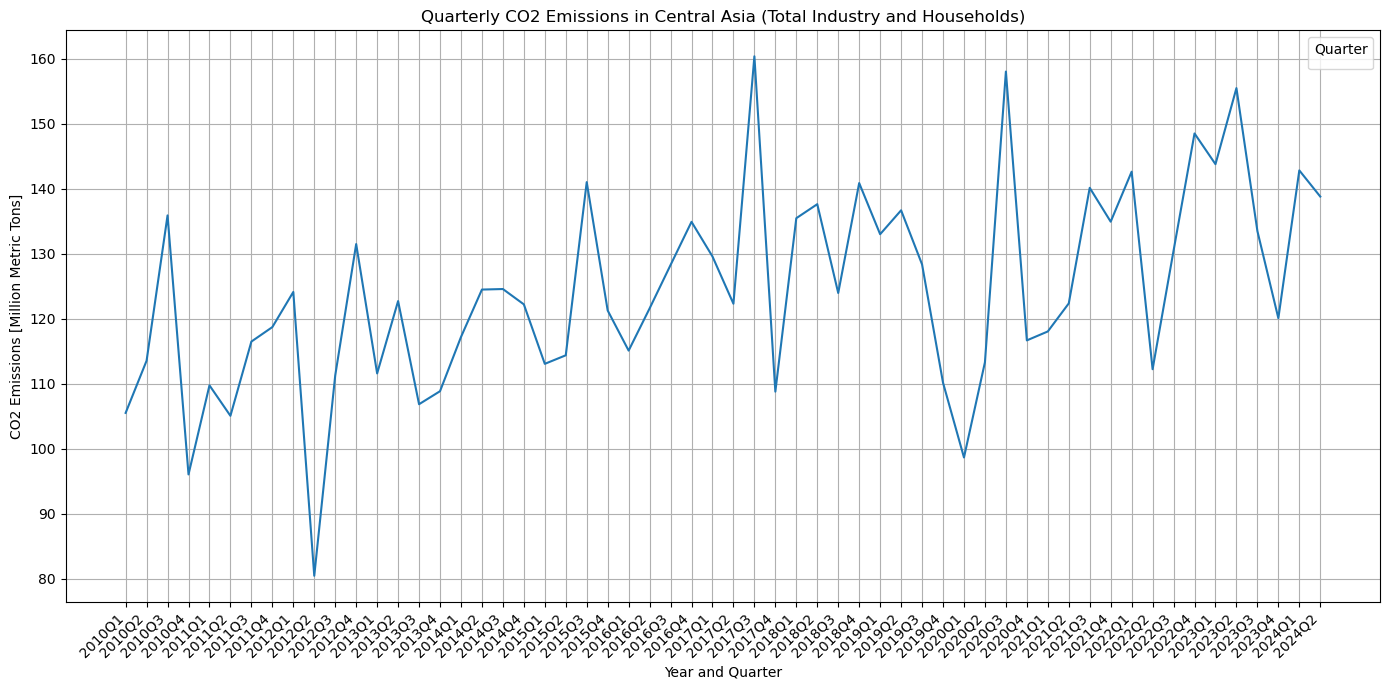

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


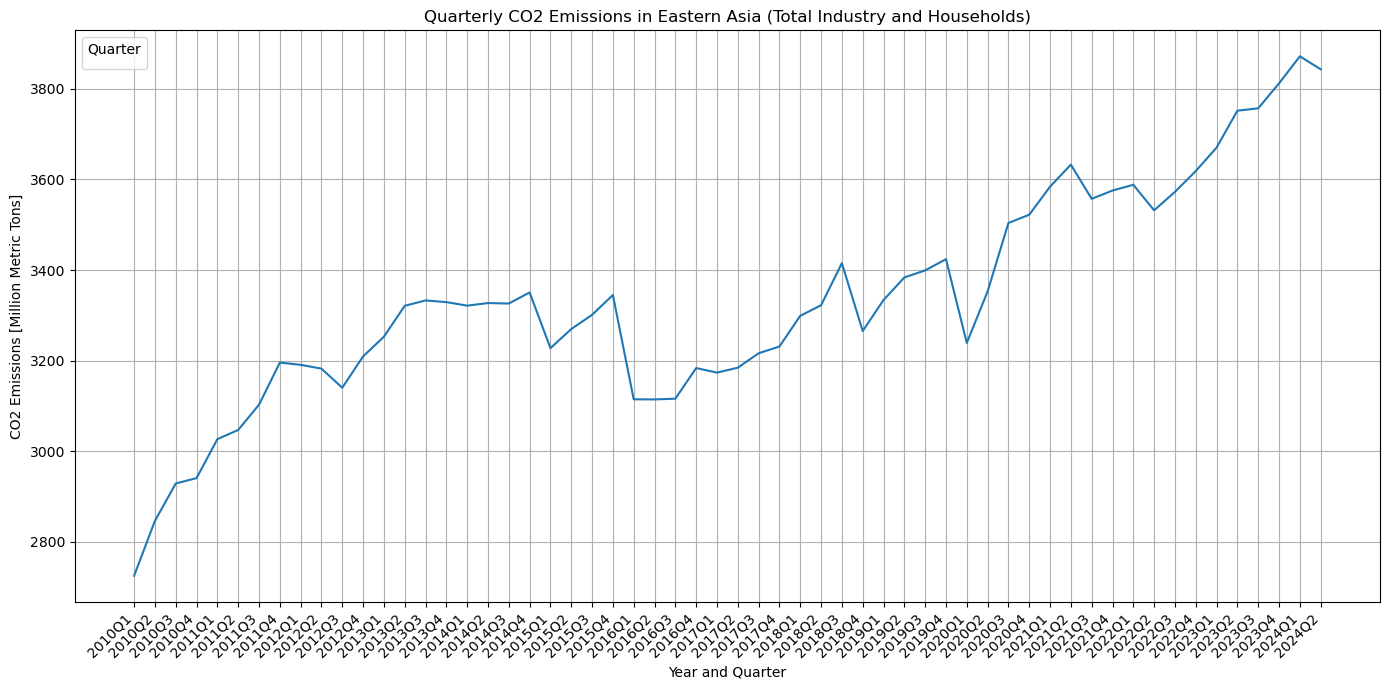

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


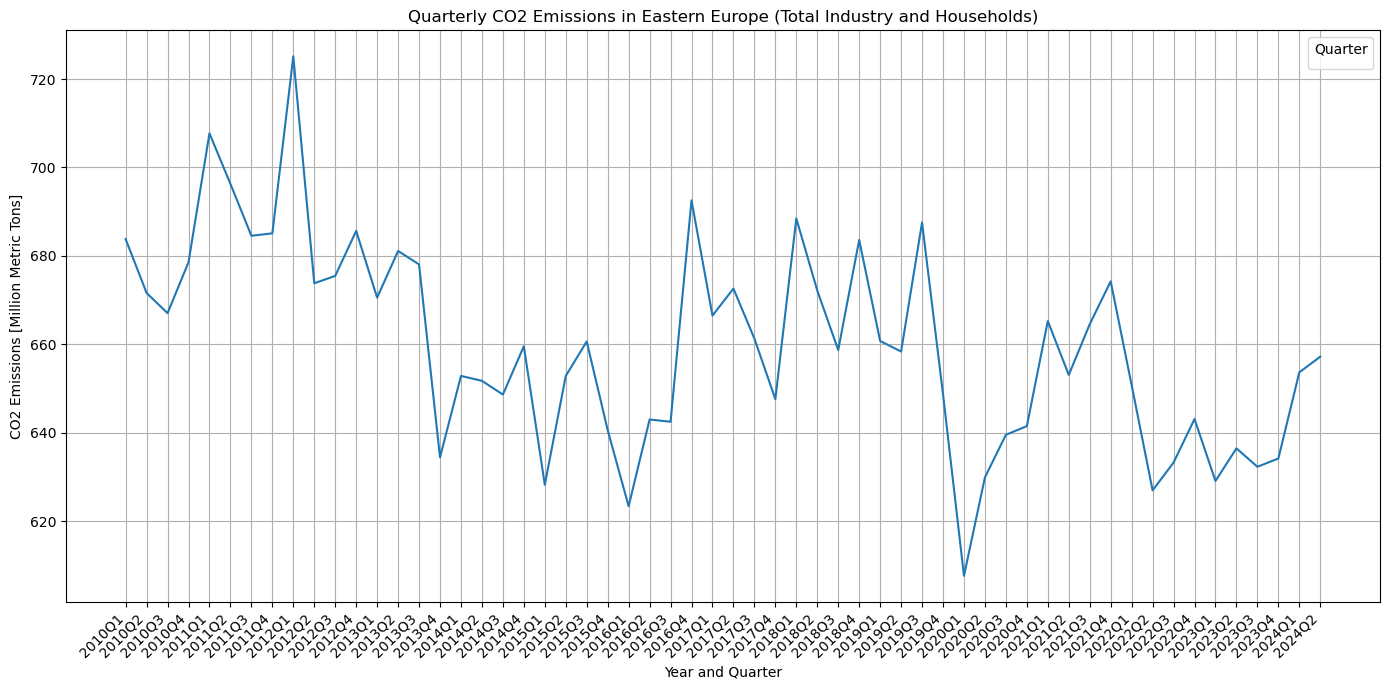

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


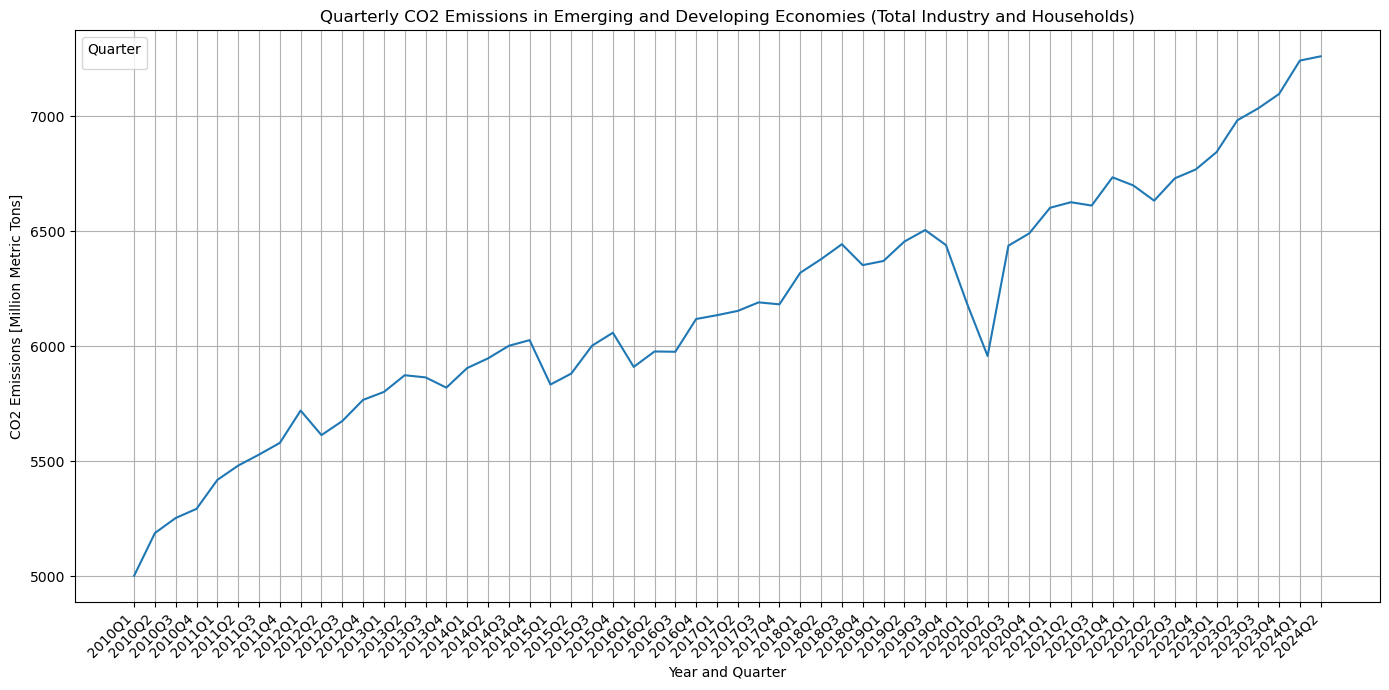

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


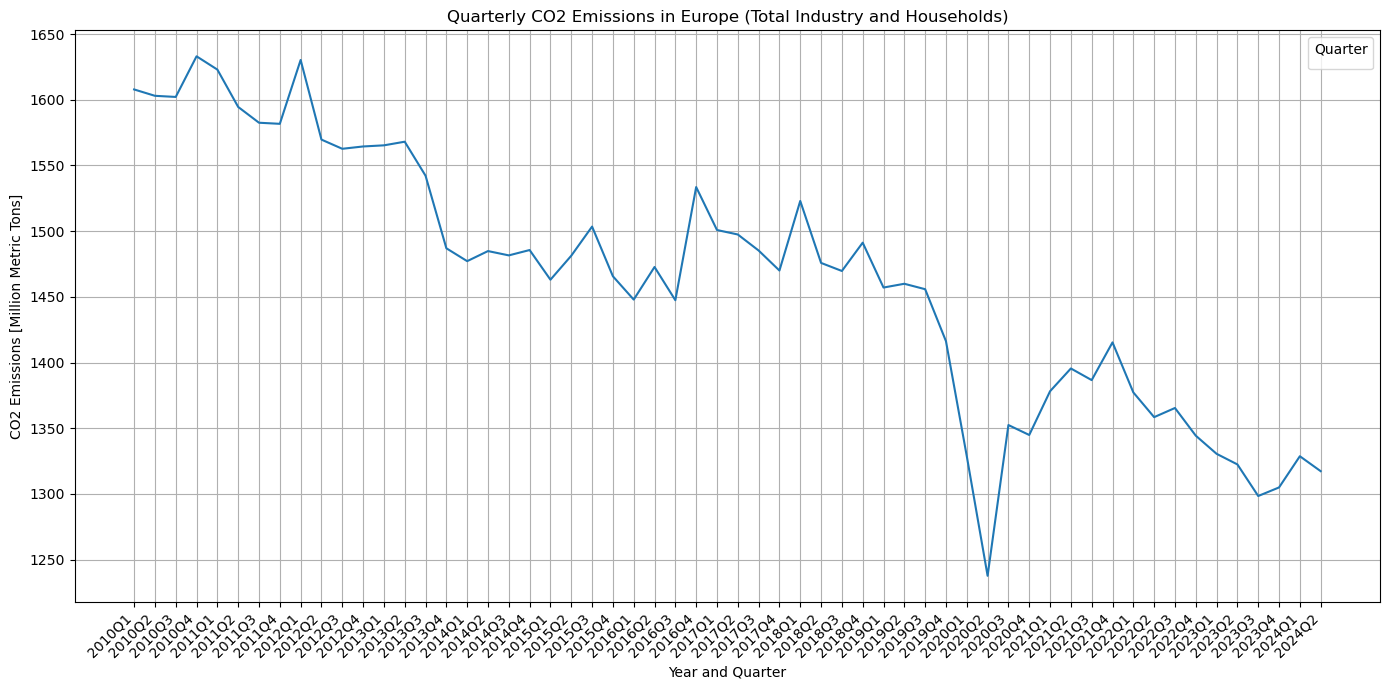

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


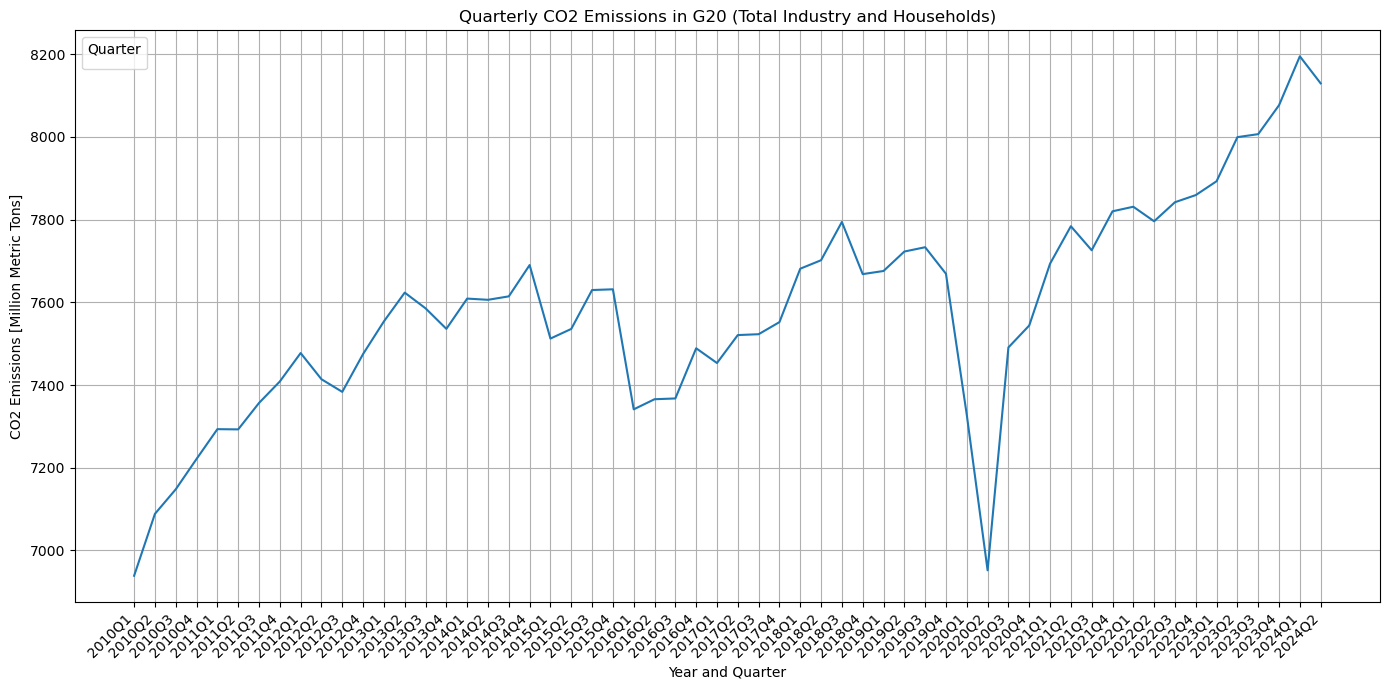

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


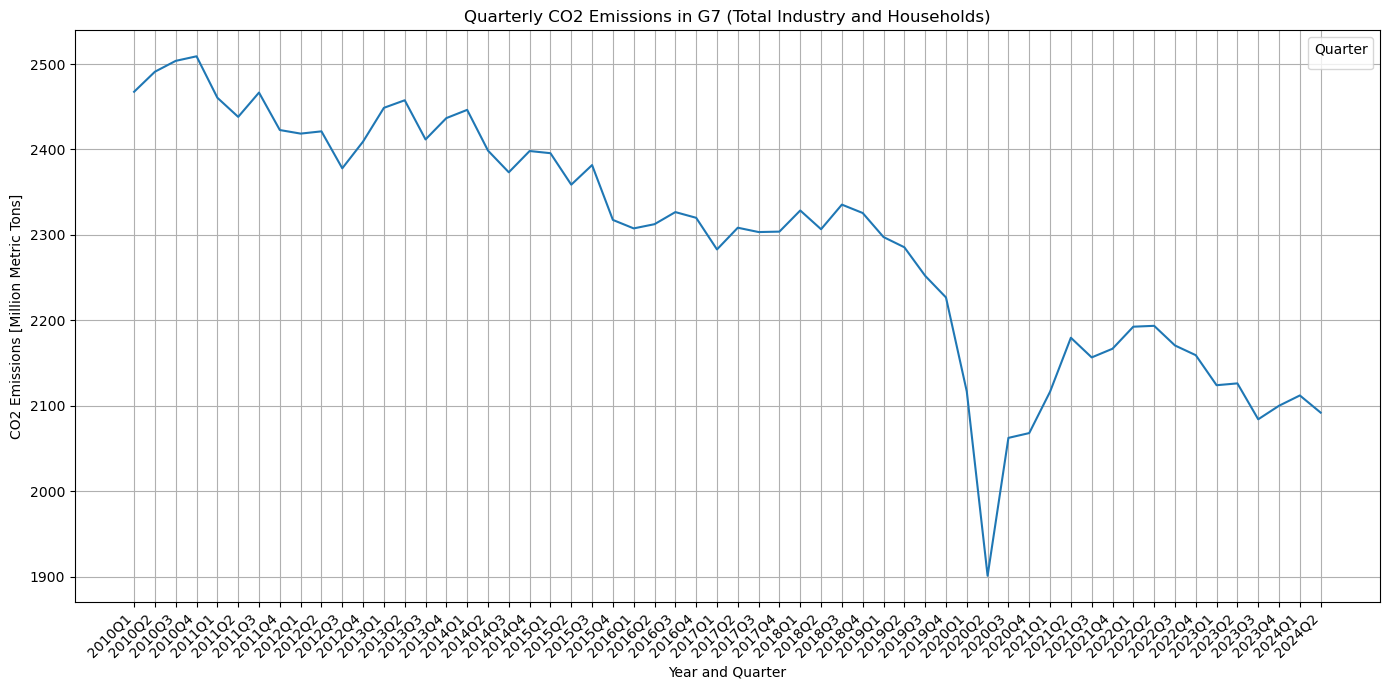

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


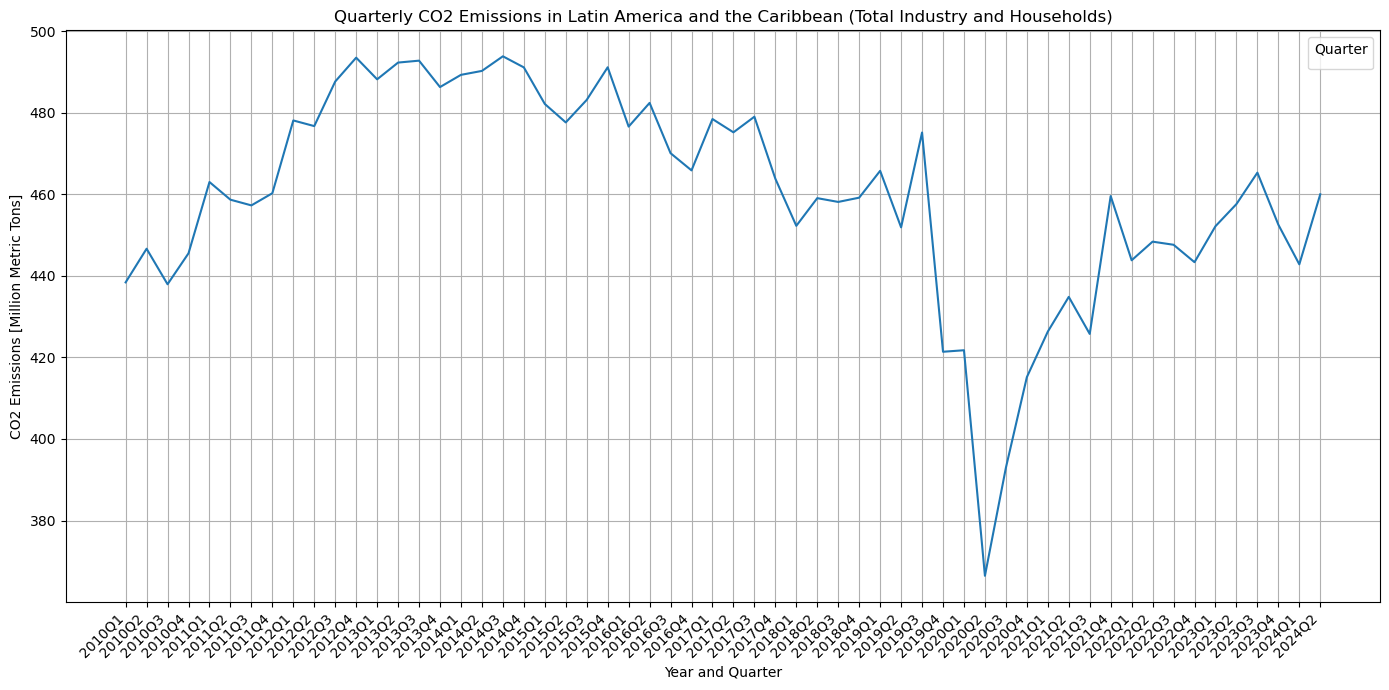

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


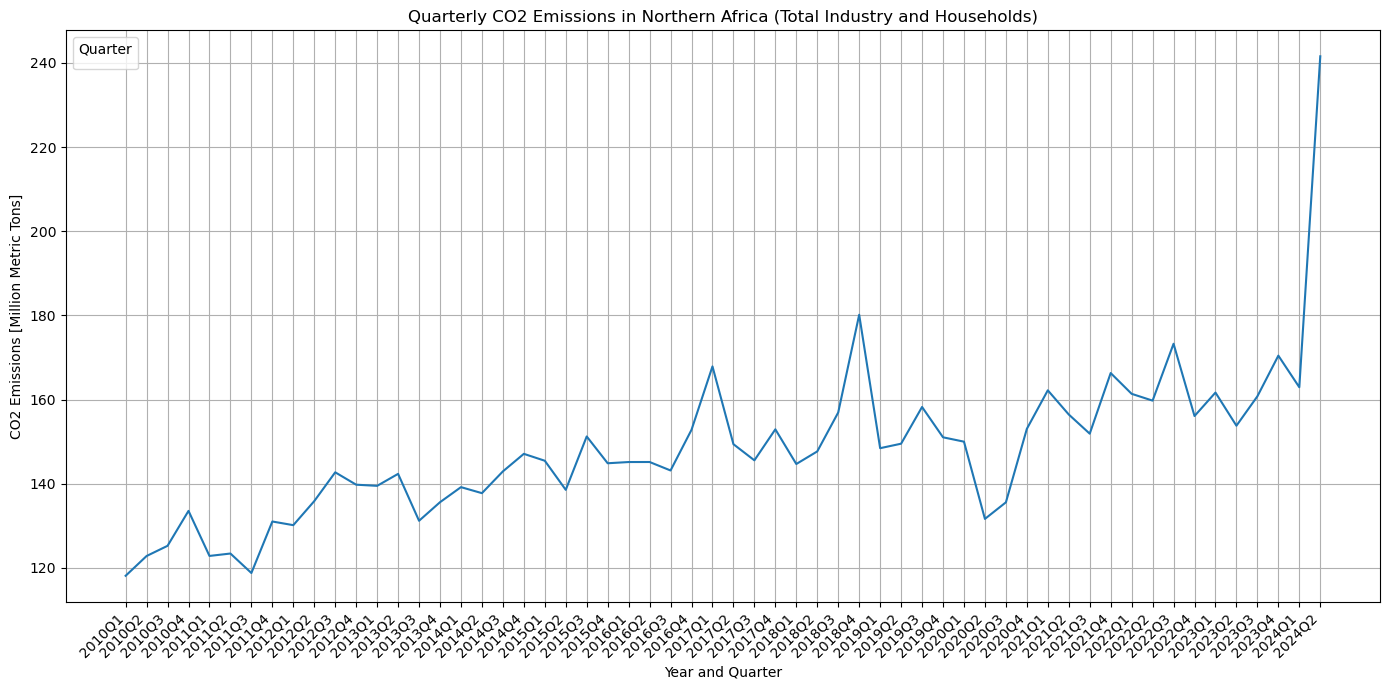

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


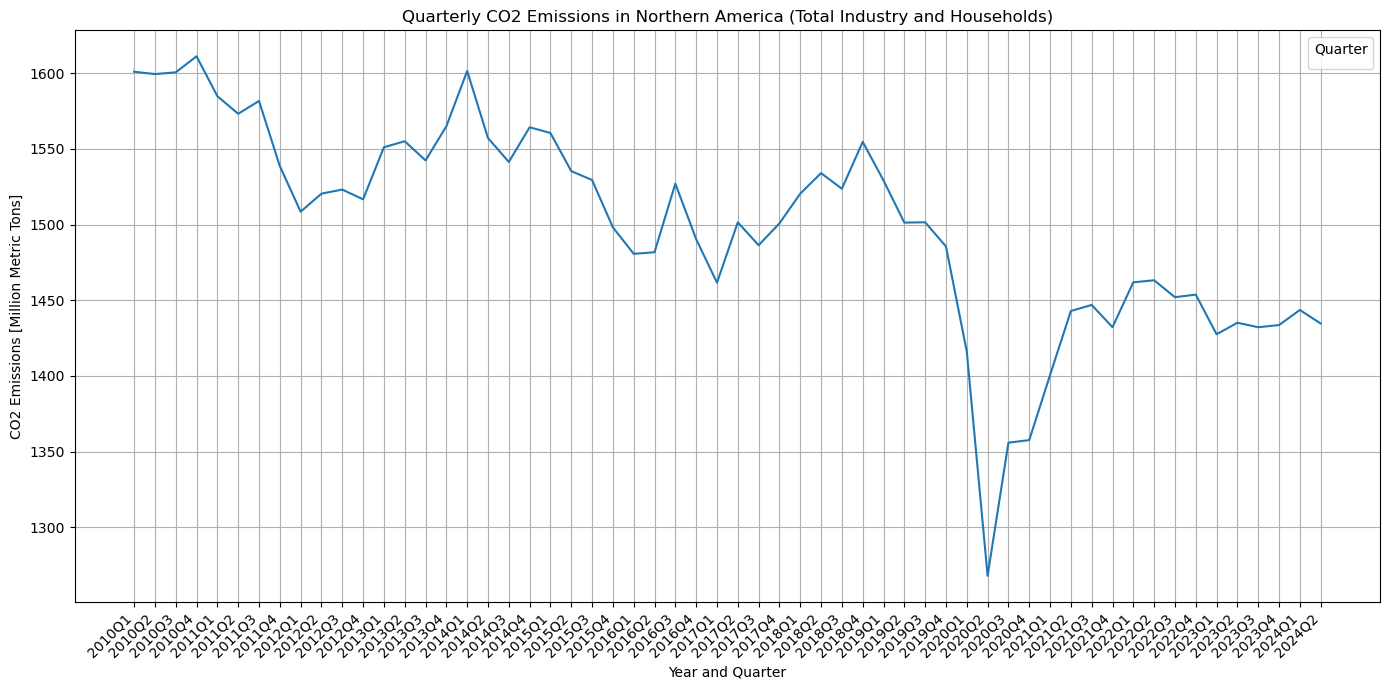

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


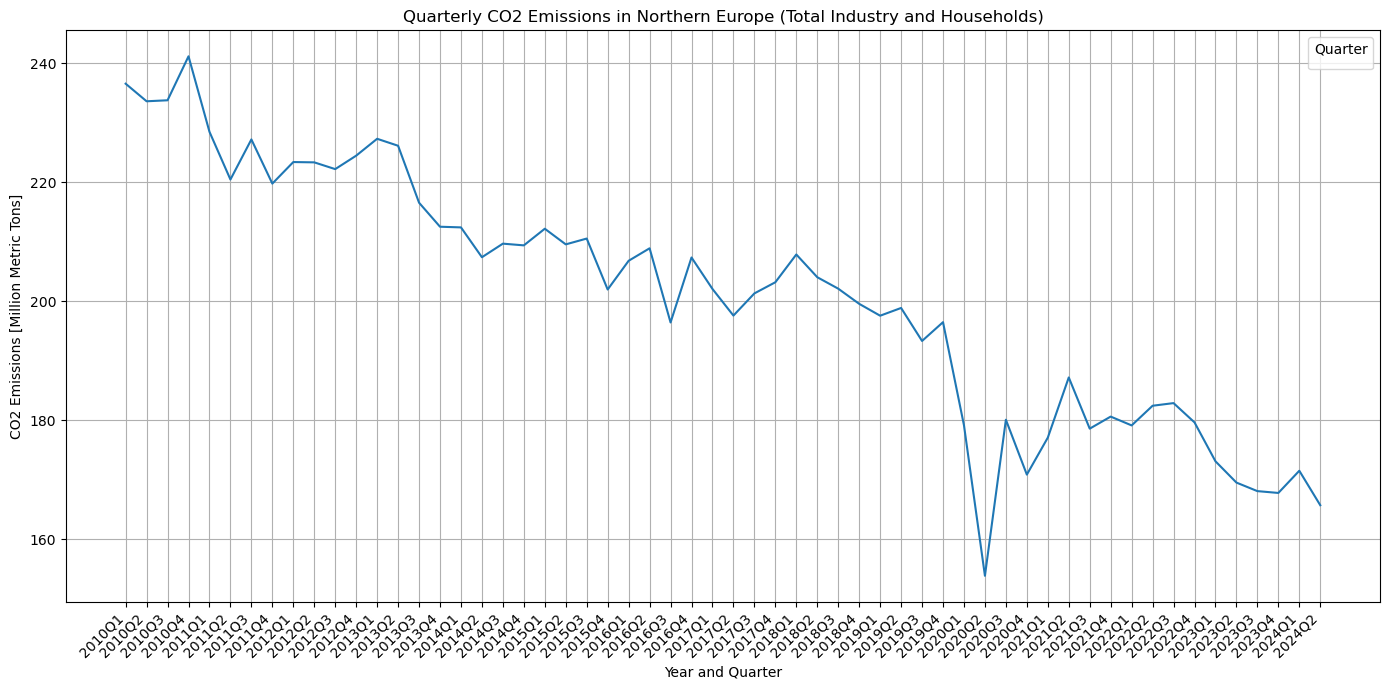

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


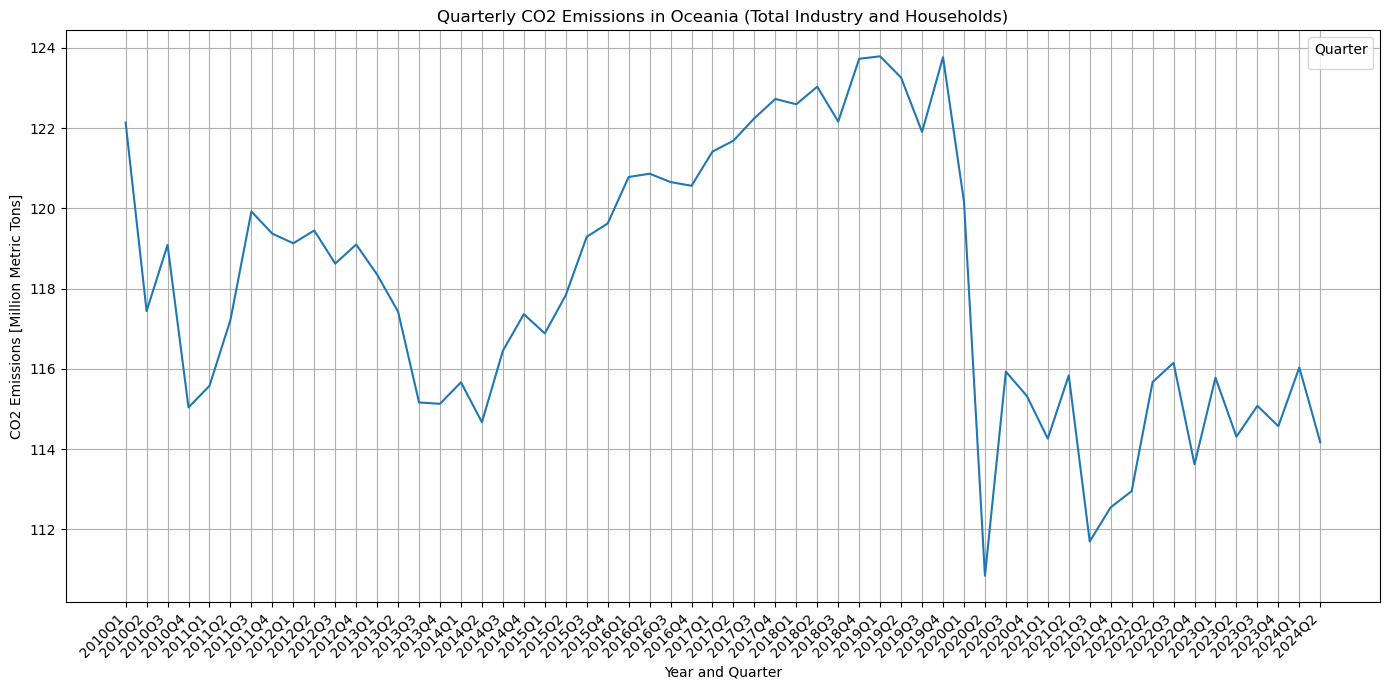

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


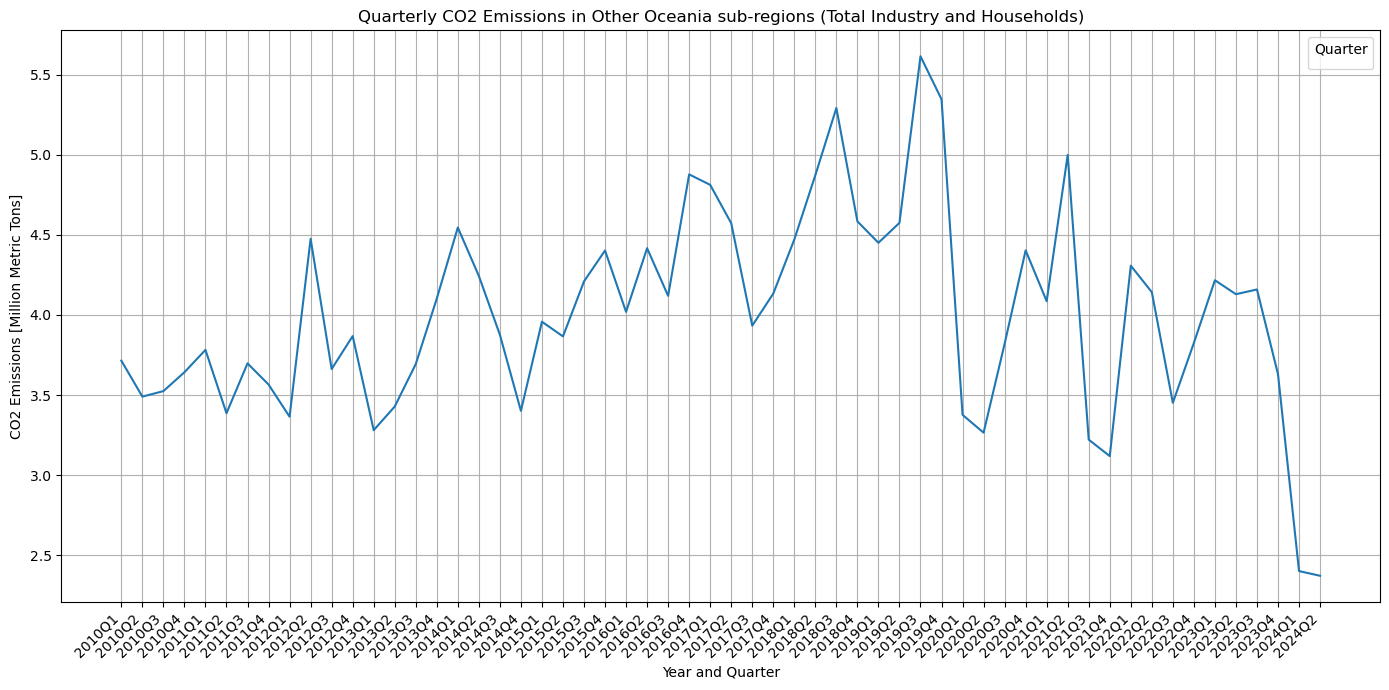

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


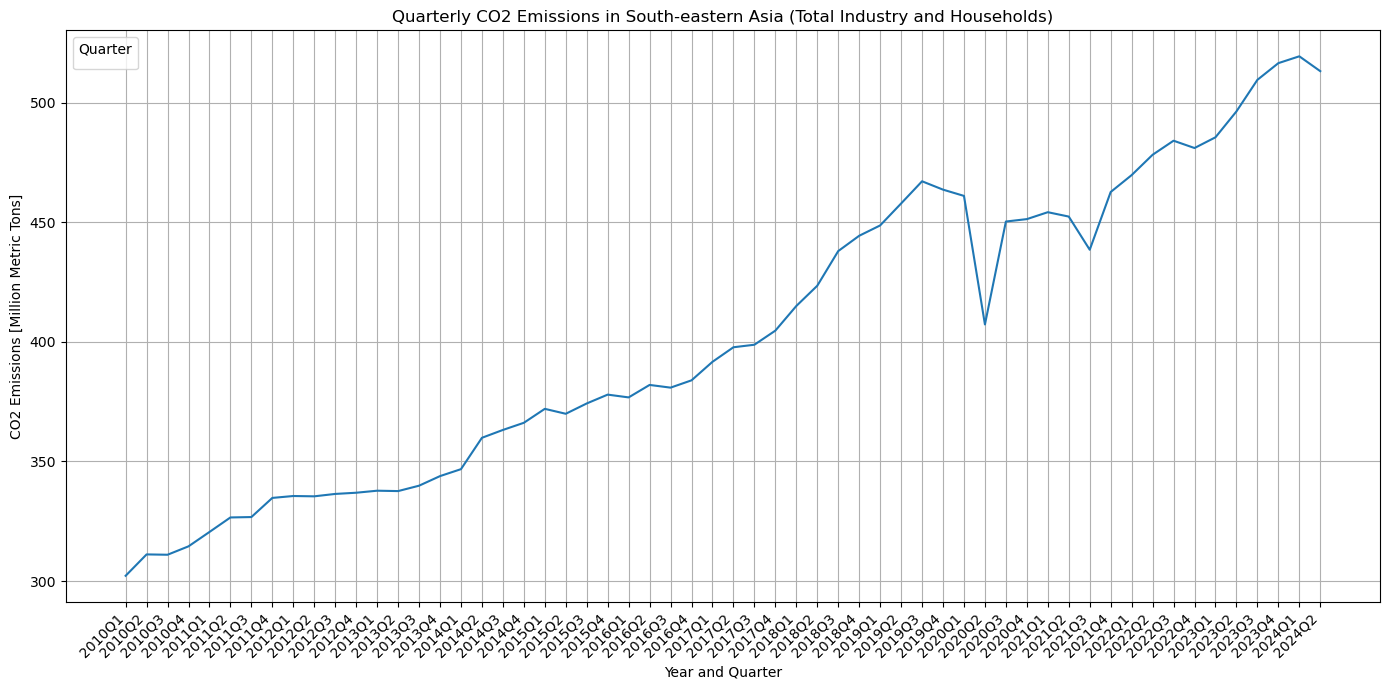

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


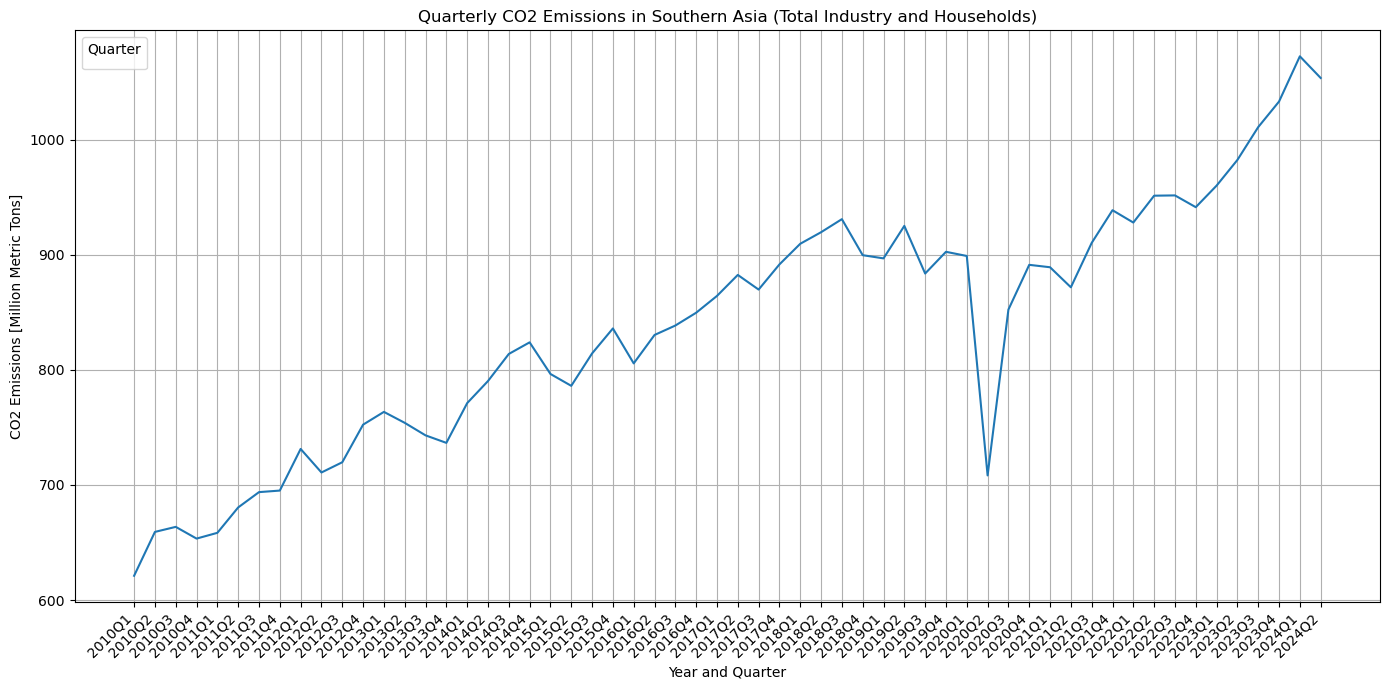

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


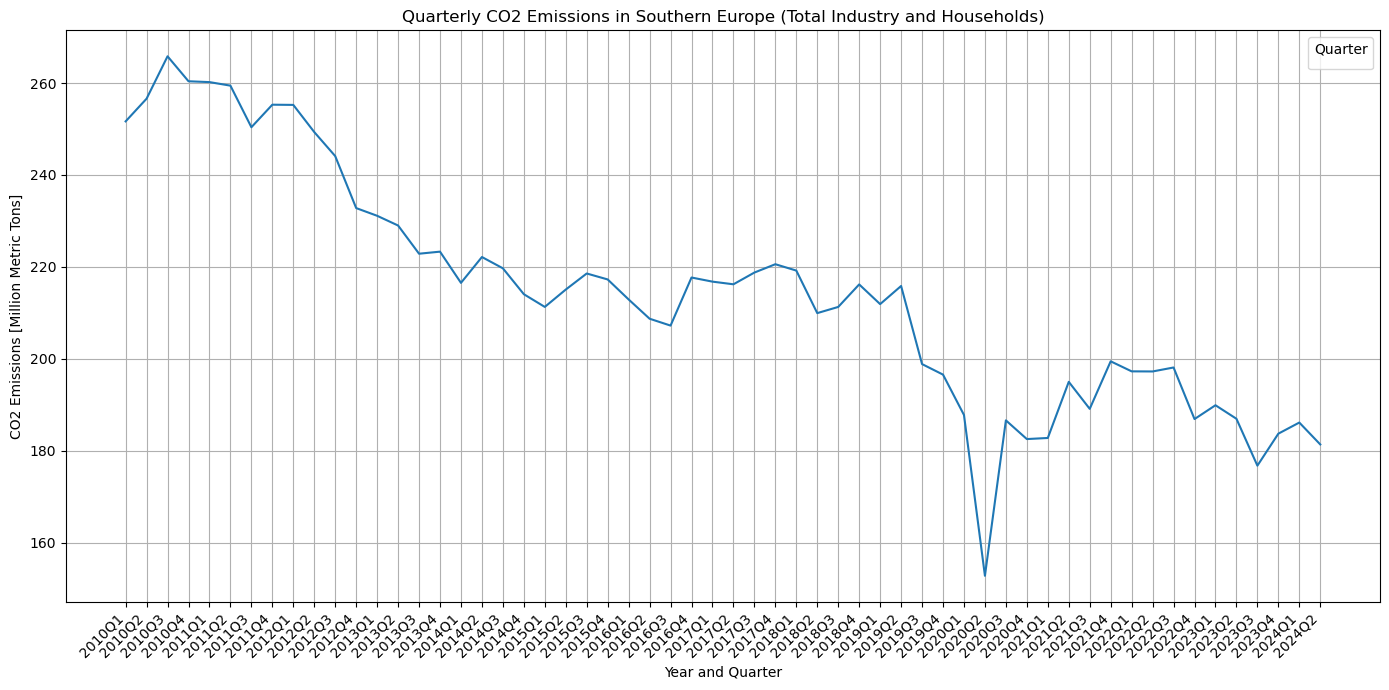

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


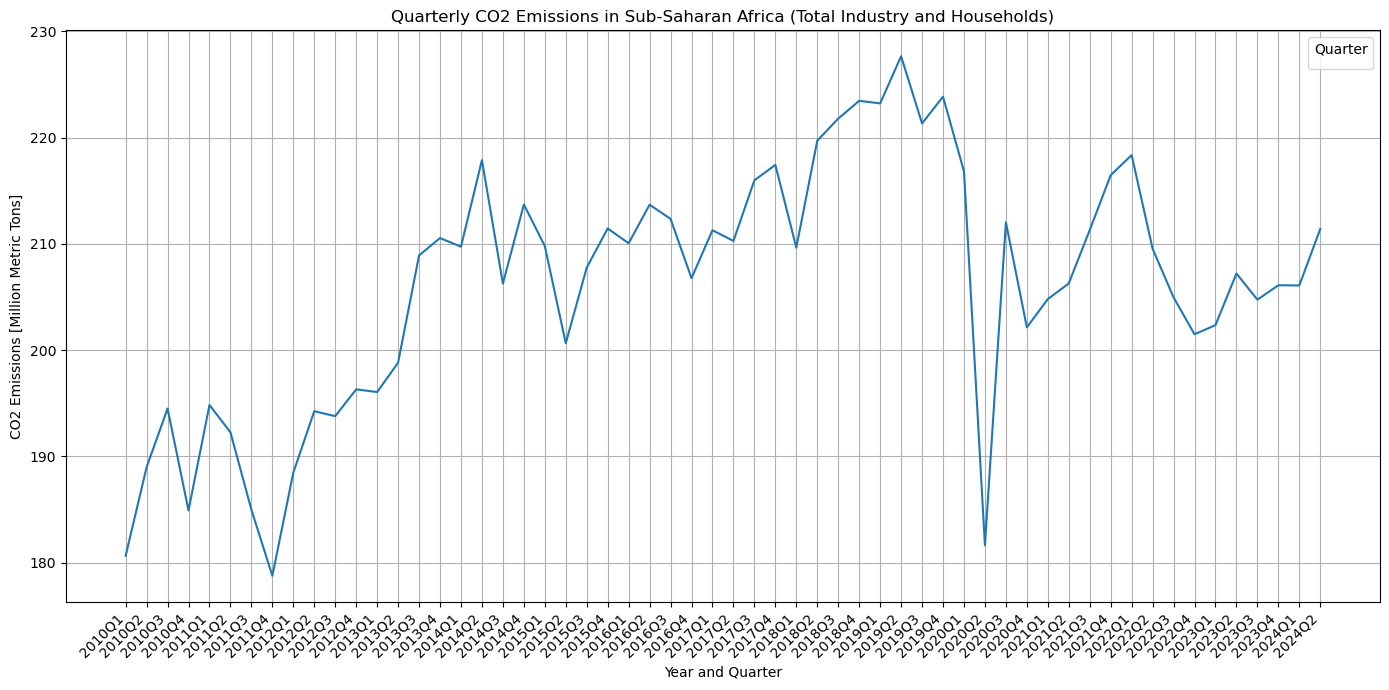

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


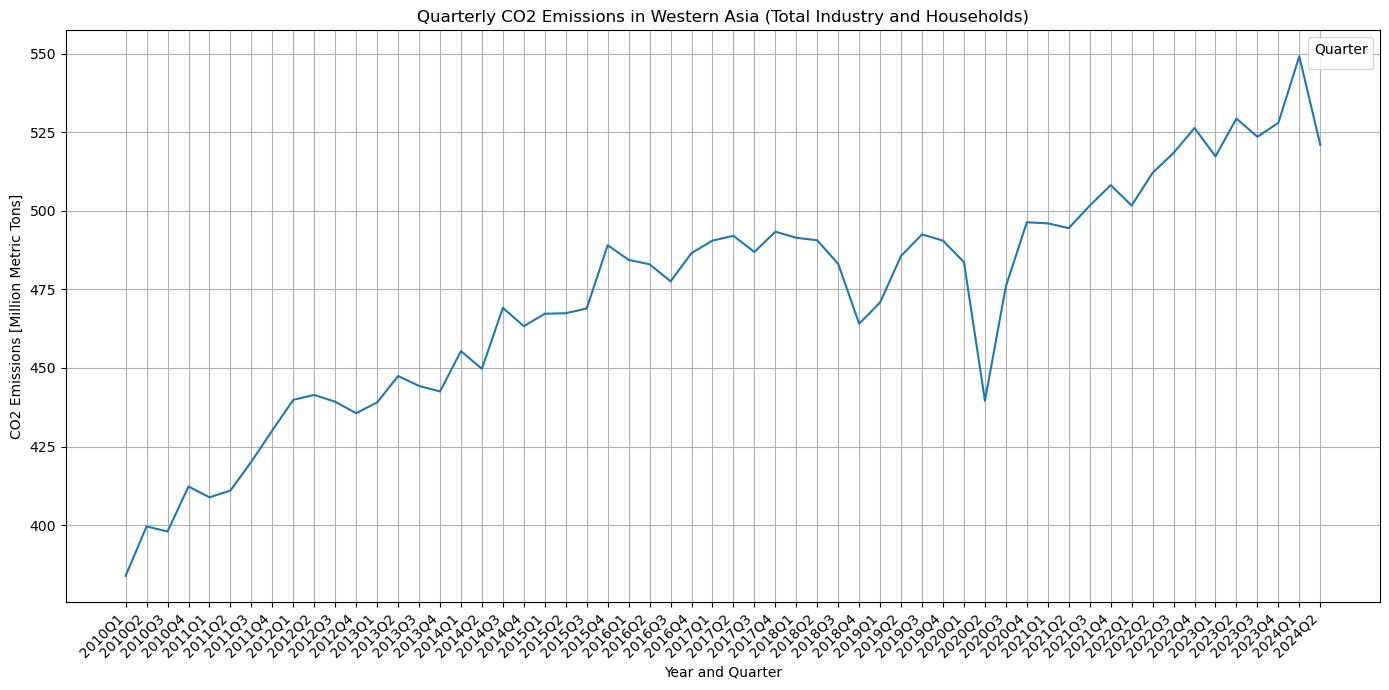

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


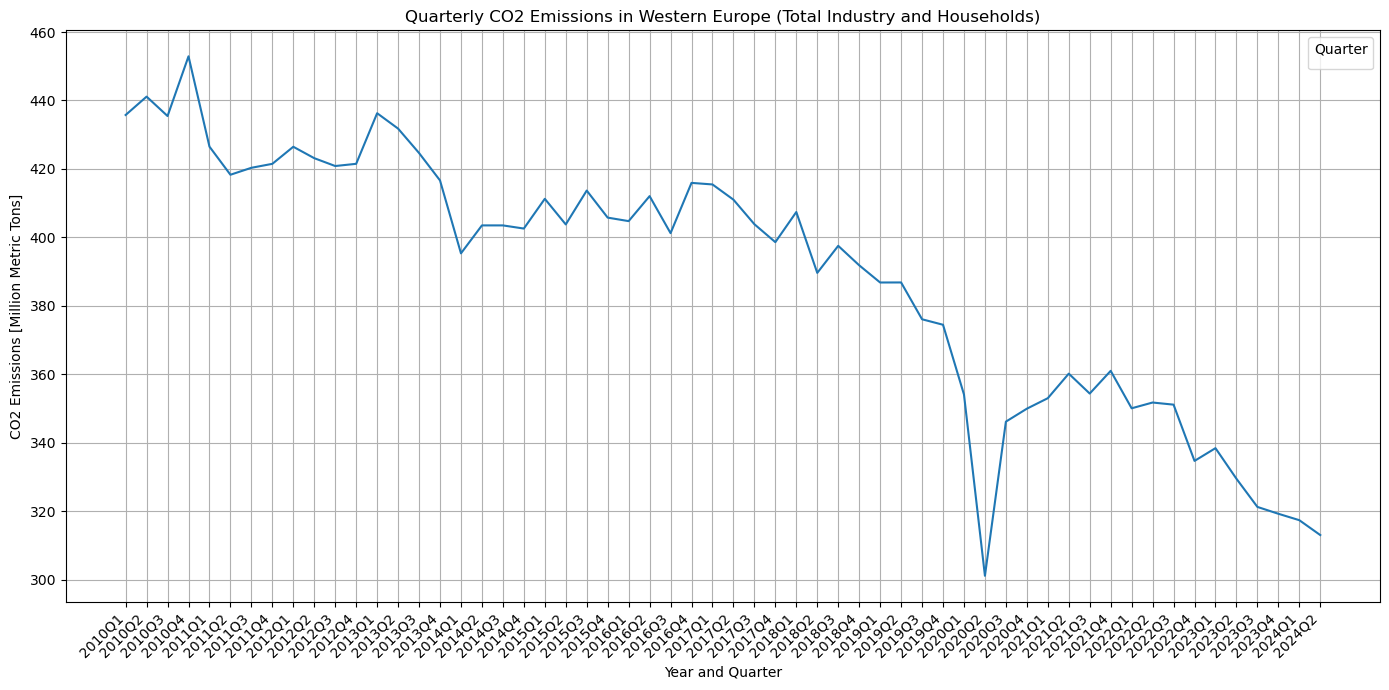

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\2551431580.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


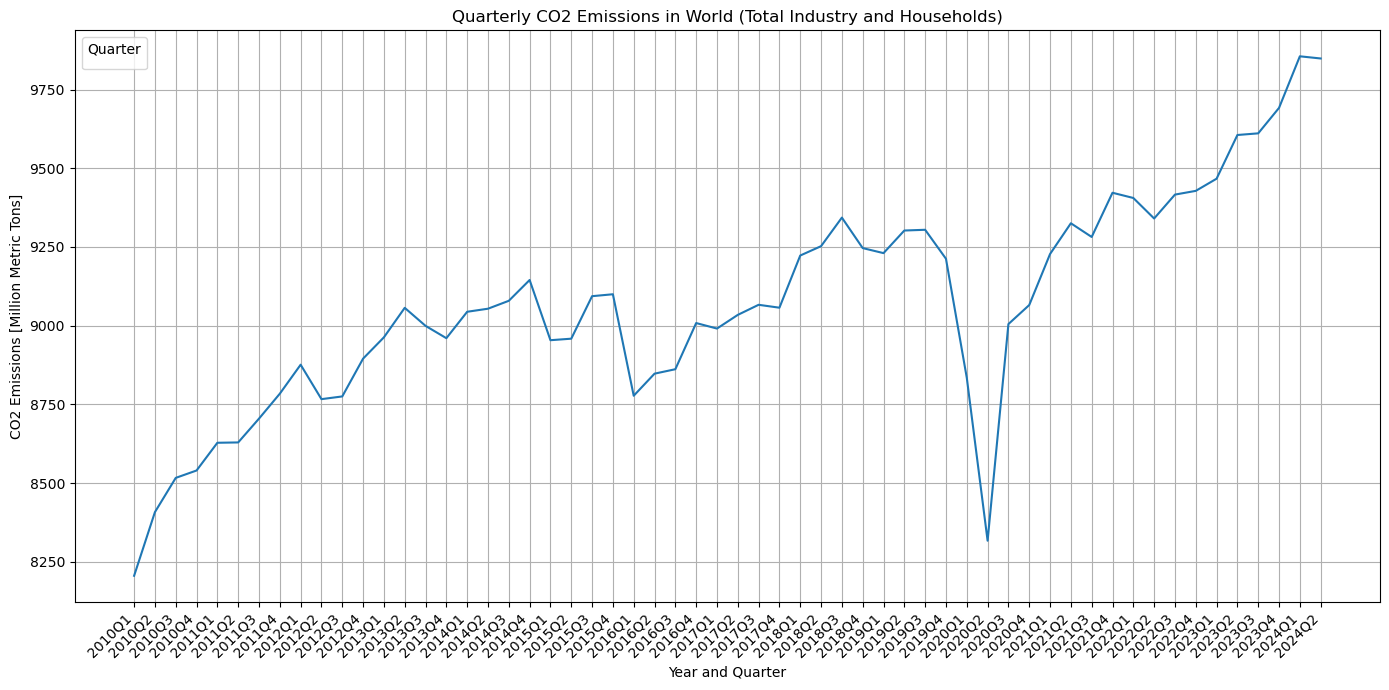

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'data/QuarterlyEmissionData.csv'
df = pd.read_csv(file_path)

df = df.drop(columns=['Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Indicator', 'Unit', 'Scale'])

id_vars = ['ObjectId', 'Country', 'Industry', 'Gas Type', 'Seasonal Adjustment']
value_vars = [col for col in df.columns if any(q in col for q in ['Q1', 'Q2', 'Q3', 'Q4'])]

df_long = pd.melt(
df,
id_vars=id_vars,
value_vars=value_vars,
var_name='Year_Quarter',
value_name='CO2_Emissions'
)

df_long[['Year', 'Quarter']] = df_long['Year_Quarter'].str.split('Q', expand=True)
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long = df_long.drop(columns=['Year_Quarter'])
df_long = df_long.dropna(subset=['Year', 'CO2_Emissions'])
df_long['CO2_Emissions'] = pd.to_numeric(df_long['CO2_Emissions'], errors='coerce')
df_long = df_long.sort_values(by=['Year', 'Quarter'])

df_long['Year_Quarter_Combined'] = df_long['Year'].astype(str) + 'Q' + df_long['Quarter']
df_long['Year_Quarter_Num'] = df_long['Year'] + (df_long['Quarter'].astype(int) - 1) / 4

df_filtered = df_long[
(df_long['Gas Type'] == 'Carbon dioxide') &
(df_long['Industry'] == 'Total Industry and Households') &
(df_long['Seasonal Adjustment'] == 'Seasonally Adjusted')
]

countries = df_filtered['Country'].unique()

for country in countries:
    country_data = df_filtered[df_filtered['Country'] == country]
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=country_data, x='Year_Quarter_Num', y='CO2_Emissions', ci=None)
    plt.xticks(
    ticks=country_data['Year_Quarter_Num'],
    labels=country_data['Year_Quarter_Combined'],
    rotation=45,
    ha='right'
    )
    plt.title(f'Quarterly CO2 Emissions in {country} (Total Industry and Households)')
    plt.xlabel('Year and Quarter')
    plt.ylabel('CO2 Emissions [Million Metric Tons]')
    plt.legend(title='Quarter')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\196971878.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.lineplot(data=filtered_data, x='Year', y='CO2_Emissions', hue='Quarter', ci=None)
C:\Users\agrab\AppData\Local\Temp\ipykernel_37484\196971878.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Quarter')


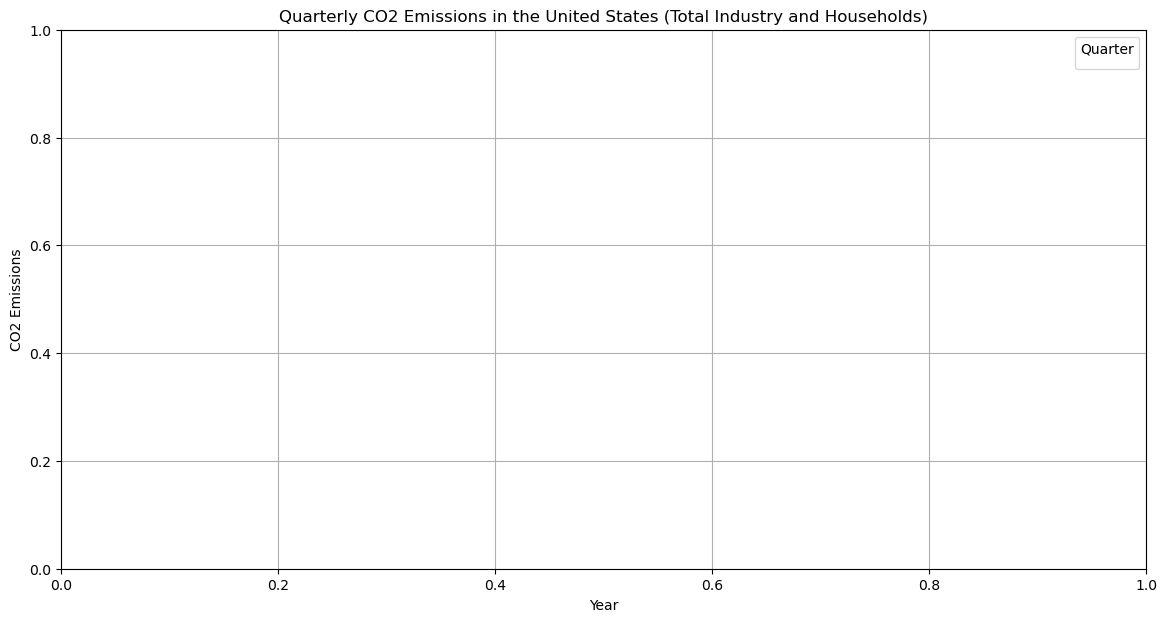

In [1]:
import pandas as pd

# ---------------------------------------------------------------------
# 1. LOAD THE DATASET
# ---------------------------------------------------------------------
# Replace 'your_file_path.csv' with the actual path to your CSV file
file_path = 'data/QuarterlyEmissionData.csv'
df = pd.read_csv(file_path)

#remove these columns as they are not needed Source,CTS Code,CTS Name,CTS Full Descriptor,
df = df.drop(columns=['Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor'])

# ---------------------------------------------------------------------
# 2. TRANSFORM WIDE TO LONG FORMAT
# ---------------------------------------------------------------------
# Columns that should remain unchanged (metadata columns)
id_vars = [
    'ObjectId', 'Country','Indicator', 'Unit', 'Scale', 'Industry', 'Gas Type', 'Seasonal Adjustment'
]

# Identify columns to unpivot (columns with years and quarters, e.g., 1995_Q1, 1995_Q2, ...)
# Use a list comprehension to find all columns that match the format "YYYY_QX"
value_vars = [col for col in df.columns if any(q in col for q in ['Q1', 'Q2', 'Q3', 'Q4'])]

# Perform the transformation using pd.melt()
df_long = pd.melt(
    df,
    id_vars=id_vars,          # Columns to keep as is
    value_vars=value_vars,    # Columns to unpivot
    var_name='Year_Quarter',  # New column name for years and quarters
    value_name='CO2_Emissions'  # New column name for values
)

# ---------------------------------------------------------------------
# 3. SPLIT 'Year_Quarter' INTO SEPARATE COLUMNS
# ---------------------------------------------------------------------
# Split the 'Year_Quarter' column into 'Year' and 'Quarter'
df_long[['Year', 'Quarter']] = df_long['Year_Quarter'].str.split('Q', expand=True)

# Ensure 'Year' is numeric
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

# Drop the 'Year_Quarter' column as it is no longer needed
df_long = df_long.drop(columns=['Year_Quarter'])

# Drop rows with missing values in critical columns
df_long = df_long.dropna(subset=['Year', 'CO2_Emissions'])

# Convert 'CO2_Emissions' to numeric (if not already)
df_long['CO2_Emissions'] = pd.to_numeric(df_long['CO2_Emissions'], errors='coerce')

# Sort the data by Year and Quarter for better readability
df_long = df_long.sort_values(by=['Year', 'Quarter'])

df_long

#Plot the United States CO2 emissions over time for "Gas Type" of Carbon dioxide and "Industry" of "Total Industry and Households" and "Seasonal Adjustment" of "Not Seasonally Adjusted"
import matplotlib.pyplot as plt
import seaborn
"""
# Filter the data
filtered_data = df_long[
    (df_long['Country'] == 'United States') &
    (df_long['Gas Type'] == 'Carbon dioxide') &
    (df_long['Industry'] == 'Total Industry and Households') &
    (df_long['Seasonal Adjustment'] == 'Not Seasonally Adjusted')
]
"""
filtered_data = df_long[
    (df_long['Country'] == 'United States')
]

# Plot the data
plt.figure(figsize=(14, 7))
seaborn.lineplot(data=filtered_data, x='Year', y='CO2_Emissions', hue='Quarter', ci=None)
plt.title('Quarterly CO2 Emissions in the United States (Total Industry and Households)')
plt.ylabel('CO2 Emissions')
plt.legend(title='Quarter')
plt.grid(True)
plt.show()



Argument: The use of fossil fuels are correlat

Counter Argument: Energy is needed for economic development to make people's lives better now. Hence, subsidies on fossil fuels right now are saving lives today, making it better